# Loi uniforme, équiprobabilité

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from tqdm import tqdm


Dans l'exercice 6 du TD 1, on se propose de calculer la probabilité qu'une aiguille de longueur $\ell$, lancée de façon aléatoire sur une table sur laquelle sont tracées des lignes parallèles espacées d'une longueur de $2a$, soit en contact avec l'une de ces lignes.

Dans ce notebook, nous proposons de vérifier le résultat obtenu dans le TD via des simulations:

$$
P = \frac{2 \ell}{\pi a}
$$

Commençons d'abord par construire un simulateur de lancé aléatoire d'aiguille.

In [2]:
def sample_angle(num_samples):
    """
    Samples angles from a uniform distribution.
    """
    return np.random.uniform(0, 2*np.pi, num_samples)

def sample_y(num_samples, a):
    """
    Samples the position of the needle in the y direction.
    """
    return np.random.uniform(-a, a, num_samples)

def sample_x(num_samples):
    """
    Samples the position of the needle in the x direction.
    """
    return np.random.uniform(0, 1, num_samples)

def sample_needle(num_samples, a):
    """
    Samples the position of the needle.
    """
    return sample_x(num_samples), sample_y(num_samples, a), sample_angle(num_samples)

Ecrivons une fonction pour visualiser les échantillons:

In [3]:
def plot_needle(ax, x, y, angle, l, color='r'):
    """
    Plots the needle.
    """
    x_1 = x + l * np.cos(angle)
    y_1 = y + l * np.sin(angle)
    x_2 = x - l * np.cos(angle)
    y_2 = y - l * np.sin(angle)
    ax.plot([y_1, y, y_2], [x_1, x, x_2], color=color, linestyle='-')
    ax.scatter(y, x, color=color)

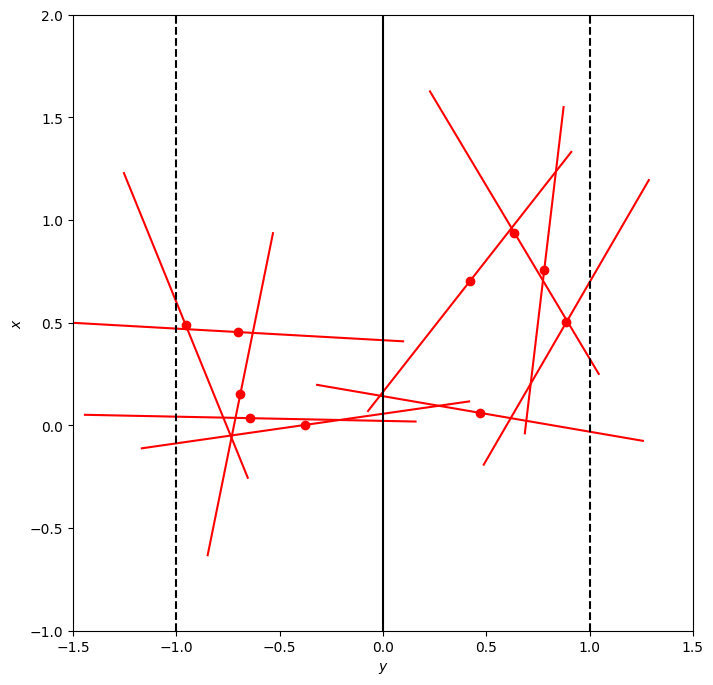

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

num_samples = 10
l = 0.8
a = 1

x, y, angle = sample_needle(num_samples, a)

for i in range(num_samples):
    plot_needle(axs, x[i], y[i], angle[i], l)

axs.axvline(x=-a, color='black', linestyle='--')
axs.axvline(x=a, color='black', linestyle='--')
axs.axvline(x=0, color='black', linestyle='-')

plt.xlim(-1.5, 1.5)
plt.ylim(-1, 2)
plt.xlabel(r"$y$")
plt.ylabel(r"$x$")
plt.show()

On peut maintenant écrire une fonction pour tester si une aiguille rencontre l'axe $y=0$.

In [5]:
def is_needle_crossing_1(y, angle, l):
    """
    Checks if the needle crosses the line y=0 by looking at the sign of the neddle's endpoints.
    """
    y_1 = y + l * np.sin(angle)
    y_2 = y - l * np.sin(angle)
    return np.sign(y_1) != np.sign(y_2)

def is_needle_crossing_2(y, angle, l):
    """
    Checks if the needle crosses the line y=0 by looking at the center of mass
    """
    return (y>= -l*np.abs(np.sin(angle))) & (y <= l*np.abs(np.sin(angle)))

In [6]:
is_needle_crossing_1(y, angle, l), is_needle_crossing_2(y, angle, l) #Les deux fonctions retournent bien le même résultat

(array([False, False, False,  True,  True, False,  True,  True,  True,
        False]),
 array([False, False, False,  True,  True, False,  True,  True,  True,
        False]))

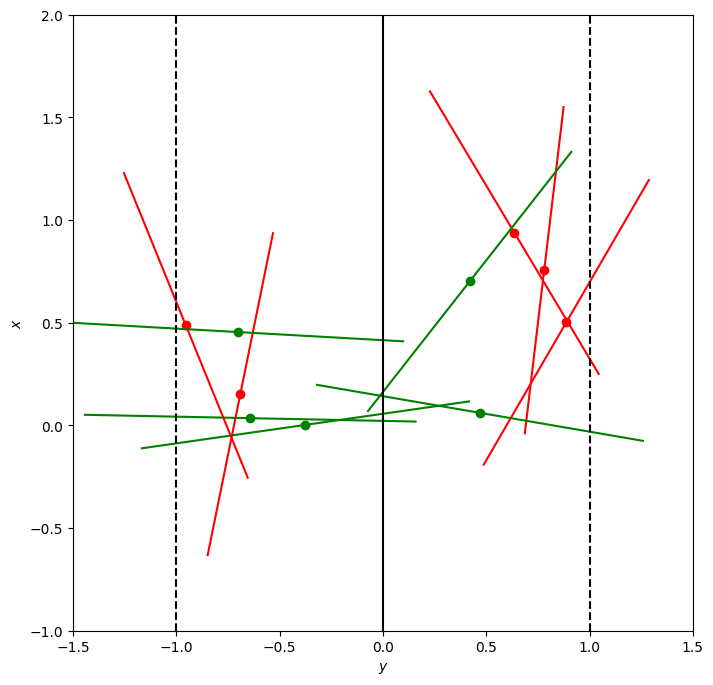

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

bool_crossing = is_needle_crossing_1(y, angle, l)

for i in range(num_samples):
    color = 'green' if bool_crossing[i] else 'red'
    plot_needle(axs, x[i], y[i], angle[i], l, color=color)

axs.axvline(x=-a, color='black', linestyle='--')
axs.axvline(x=a, color='black', linestyle='--')
axs.axvline(x=0, color='black', linestyle='-')

plt.xlim(-1.5, 1.5)
plt.ylim(-1, 2)
plt.xlabel(r"$y$")
plt.ylabel(r"$x$")
plt.show()

On peut maintenant écrire une fonction pour calculer la probabilité. Une façon de le faire est de calculer la fréquence à laquelle l'aiguille intersecte la droite $y=0$.

In [8]:
def compute_probability(num_samples, a, l):
    """
    Computes the probability of the needle crossing the line y=0.
    """
    _, y, angle = sample_needle(num_samples, a)
    bool_crossing = is_needle_crossing_1(y, angle, l)
    return np.mean(bool_crossing)

In [16]:
num_samples = 100_000
l = 0.8
a = 1

proba = compute_probability(num_samples, a, l)
print(f"Probability of crossing: {proba: .4f}")
print(f"Target probability: {2*l/(np.pi*a): .4f}")

Probability of crossing:  0.5094
Target probability:  0.5093


On peut finalement étudier ce qu'il se passe quand on varit la taille des échantillons utilisés pour estimer la proba.

In [17]:
def sample_proba(num_iter, num_samples, a, l):
    """
    Samples the probability of the needle crossing the line y=0.
    """
    return np.array([compute_probability(num_samples, a, l) for _ in range(num_iter)])

In [18]:
num_samples_list = [10, 100, 1_000, 10_000, 100_000, 1_000_000]

num_iter = 5_000
proba_list = [sample_proba(num_iter, num_samples, a, l) for num_samples in tqdm(num_samples_list)]

100%|██████████| 6/6 [10:10<00:00, 101.67s/it]


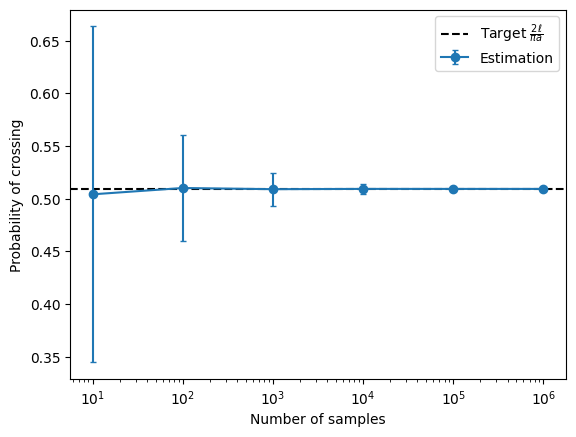

In [19]:
plt.figure()

plt.axhline(y=2*l/(np.pi*a), color='black', linestyle='--', label=r"Target $\frac{2 \ell}{\pi a}$")
plt.errorbar(num_samples_list, np.mean(proba_list, axis=1), yerr=np.std(proba_list, axis=1), marker='o', label="Estimation", capsize=2)

plt.xlabel("Number of samples")
plt.ylabel("Probability of crossing")
plt.legend()
plt.xscale('log')

Faisons un zoom sur les grands nombres d'échantillons pour vérifier que l'on récupère le bon résultat en moyenne.

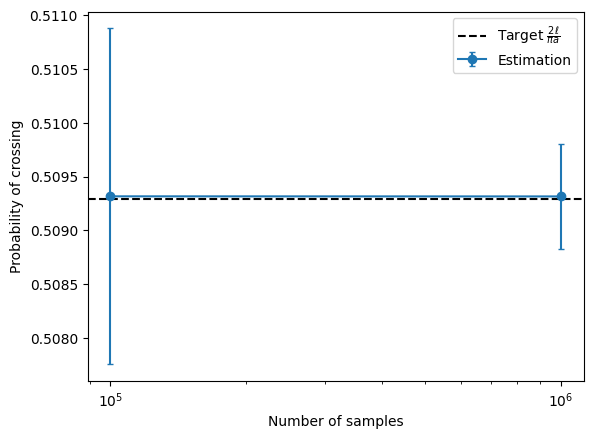

In [20]:
plt.figure()

plt.axhline(y=2*l/(np.pi*a), color='black', linestyle='--', label=r"Target $\frac{2 \ell}{\pi a}$")
plt.errorbar(num_samples_list[-2:], np.mean(proba_list, axis=1)[-2:], yerr=np.std(proba_list, axis=1)[-2:], marker='o', label="Estimation", capsize=2)

plt.xlabel("Number of samples")
plt.ylabel("Probability of crossing")
plt.legend()
plt.xscale('log')

On voit qu'en augmentant le nombre d'échantillon, la prédiction faite par notre simulateur aléatoire est plus confiante!
On peut aller plus loin:

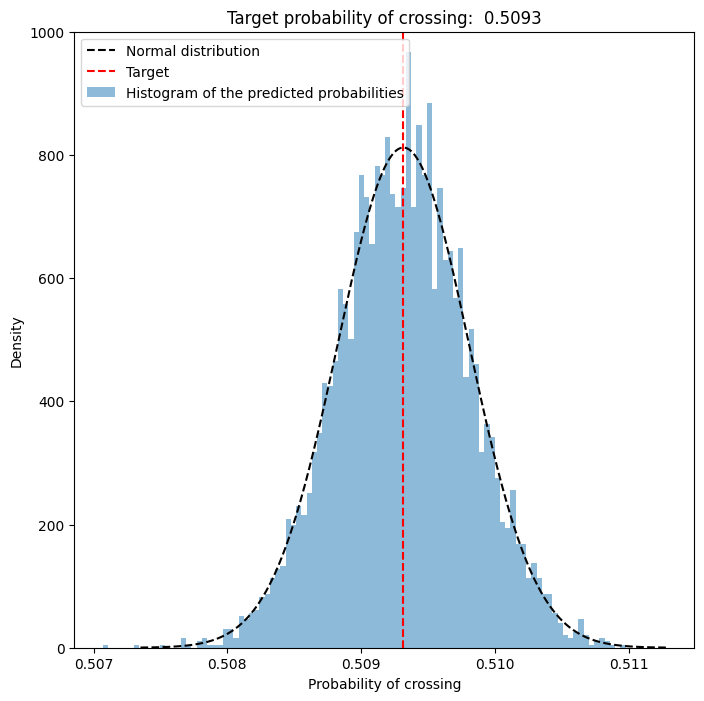

In [21]:
plt.figure(figsize=(8,8))

mu = np.mean(proba_list[-1])
std = np.std(proba_list[-1])
x = np.linspace(mu - 4*std, mu + 4*std, 1000)

y = stats.norm.pdf(x, mu, std)

plt.plot(x, y, label="Normal distribution", linestyle='--', color='black')
plt.axvline(x=mu, color='red', linestyle='--', label="Target")

plt.hist(proba_list[-1], bins=100, density=True, alpha=0.5, label="Histogram of the predicted probabilities")


plt.ylim(0, 1000)
plt.xlabel("Probability of crossing")
plt.ylabel("Density")
plt.legend(loc='upper left')
plt.title(f"Target probability of crossing: {2*l/(np.pi*a): .4f}")
plt.show()

On peut voir, que dans la limite d'un grand nombre d'échantillons, on peut vérifier le théorème centrale limite. :)